In [ ]:
import tensorflow.compat.v1 as tf
import numpy as np

tf.disable_v2_behavior()

x_data = np.random.rand(100).astype(np.float32)
y_data = x_data*0.1 + 0.3

Weights = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
biases = tf.Variable(tf.zeros([1]))

y = Weights*x_data + biases

loss = tf.reduce_mean(tf.square(y-y_data))
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

init = tf.initialize_all_variables()

sess = tf.Session()
sess.run(init)

for step in range(201):
    sess.run(train)
    if step % 20 == 0:
        print(step, sess.run(Weights), sess.run(biases))



In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

state = tf.Variable(0, name='whatever')
print(state.name)

In [ ]:
# 下面这个是简单的counter++的例子
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

state = tf.Variable(0, name='counter')
one = tf.constant(1)

new_value = tf.add(state, one)
update = tf.assign(state, new_value)

init = tf.initialize_all_variables()

with tf.Session() as sess:
    sess.run(init)
    for _ in range(3):
        sess.run(update)
        print(sess.run(state))

In [4]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
input1 = tf.placeholder(tf.float32)
input2 = tf.placeholder(tf.float32)
output = tf.multiply(input1, input2)

with tf.Session() as sess:
    print(sess.run(output, feed_dict={input1: [7.], input2: [2.]}))

[14.]


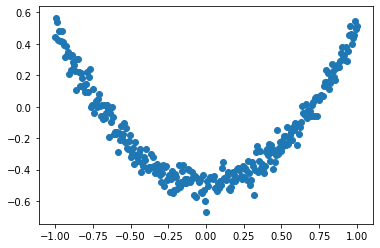

In [2]:
# 激励函数的作用是将线性函数转换成非线性的
# 激活函数必须可导
# CNN: relu
# tensorboard可以看整个tensorflow的结构
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import matplotlib.pyplot as plt

def add_layer(inputs, in_size, out_size, activation_function=None):
    Weights = tf.Variable(tf.random_normal([in_size, out_size]))
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.1)
    Wx_plus_b = tf.matmul(inputs, Weights) + biases
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    return outputs

x_data = np.linspace(-1, 1, 300)[:, np.newaxis]
noise = np.random.normal(0, 0.05, x_data.shape)
y_data = np.square(x_data) - 0.5 + noise

xs = tf.placeholder(tf.float32, [None, 1])
ys = tf.placeholder(tf.float32, [None, 1])

l1 = add_layer(xs, 1, 10, activation_function=tf.nn.relu)
prediction = add_layer(l1, 10, 1, activation_function=None)

loss = tf.reduce_mean(
    tf.reduce_sum(tf.square(ys - prediction), 
                  reduction_indices=[1]))

train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x_data, y_data)
plt.ion()
plt.show()

for i in range(1000):
    sess.run(train_step, feed_dict={xs: x_data, ys: y_data})
    if i % 50 == 0:
        #print(sess.run(loss, feed_dict={xs: x_data, ys: y_data}))
        try:
            ax.lines.remove(lines[0])
        except Exception:
            pass
        prediction_value = sess.run(prediction, feed_dict={xs: x_data, ys: y_data})
        lines = ax.plot(x_data, prediction_value, 'r-', lw=5)
        plt.pause(0.1)
        

In [ ]:
# https://www.bilibili.com/video/av16001891?p=18
# SGD, Stochastic Gradient Descent，数据切分后训练
# Momentum，学习W效率提升
# AdaGrad，每个参数不同的学习效率（不走弯路）
# RMSProp = Momentum+AdaGrad
